In [4]:
library(ggplot2)
library(grid)
library(data.table)
library(Rmisc)
library(dplyr)
library(broom)

In [2]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

In [47]:
## DATA FROM JOHNSON ET AL. 2018 PROC B

#Load in dataset containing only my cities
setwd("/Users/jamessantangelo/Desktop")
Johnson_et_al_data <- read.csv("20_Cities_Johnson-et-al.csv")

#Run model testing for change in HCN frequency with standardized distance across matrix. 
#Performed separately for each city
Johnson_lm <- Johnson_et_al_data %>%
    group_by(city) %>%
    do(FitCityCyan = lm(cy ~ std_dist, data = .))

#Create data frame with results from linear models of Cyan
Johnson_lmSummary = tidy(Johnson_lm, FitCityCyan)

#Subset linear models to only include slopes and p-values
Johnson_lmSummary_filtered <- Johnson_lmSummary %>%
    filter(term == "std_dist") %>%
    select(estimate, p.value) %>%
    mutate(dataset = "Johnson_et_al", sig = ifelse(p.value < 0.05, "Yes", "No"), category = "observed") %>%
    rename(cline = city)


head(Johnson_lmSummary_filtered)

Adding missing grouping variables: `city`


cline,estimate,p.value,dataset,sig,category
Acton,0.02380528,0.8281912,Johnson_et_al,No,observed
Angus,0.02113005,0.8858719,Johnson_et_al,No,observed
Barrie,0.08500176,0.3330125,Johnson_et_al,No,observed
Bradford,-0.01125574,0.8875485,Johnson_et_al,No,observed
Brantford,0.09540613,0.3219262,Johnson_et_al,No,observed
Cobourg,-0.01218471,0.9060116,Johnson_et_al,No,observed


In [48]:
# DATA FROM THOMPSON ET AL. 2016 PROC B

setwd("/Users/jamessantangelo/Documents/Academia/Doctorate_PhD/Projects/UAC_Urban-adaptive-clines-in-white-clover/UAC_Misc/Ken's data and R script/CSV's")
Thompson_et_al_data <- read.csv("2016-02-17-UAC-NatPop_Data.csv", header = T)

Thompson_et_al_data$cline_id <- with(Thompson_et_al_data, paste(City, Transect, sep=""))

#Run model testing for change in HCN frequency with standardized distance across matrix. 
#Performed separately for each city
Thompson_lm <- Thompson_et_al_data %>%
    group_by(cline_id) %>%
    mutate(range = max(DistToCore) - min(DistToCore), 
           Distance_std = ((DistToCore - min(DistToCore)) / range)) %>%
    do(FitCityCyan = lm(PropCyanogenic ~ Distance_std, data = .))

#Create data frame with results from linear models of Cyan
Thompson_lmSummary = tidy(Thompson_lm, FitCityCyan)

#Subset linear models to only include slopes and p-values
Thompson_lmSummary_filtered <- Thompson_lmSummary %>%
    filter(term == "Distance_std") %>%
    select(estimate, p.value) %>%
    mutate(dataset = "Thompson_et_al", sig = ifelse(p.value < 0.05, "Yes", "No"), category = "observed") %>%
    rename(cline = cline_id)

head(Thompson_lmSummary_filtered)

Adding missing grouping variables: `cline_id`


cline,estimate,p.value,dataset,sig,category
B,0.11918070,4.948444e-02,Thompson_et_al,Yes,observed
M,-0.05694601,5.698033e-01,Thompson_et_al,No,observed
TA,0.26689588,5.327848e-03,Thompson_et_al,Yes,observed
TB,0.29324156,3.609068e-06,Thompson_et_al,Yes,observed
TC,0.29536563,7.970367e-03,Thompson_et_al,Yes,observed
Y,0.14541022,1.181334e-02,Thompson_et_al,Yes,observed


In [49]:
# DATA FROM SIMULATIONS IN SANTANGELO ET AL. 2018 PROC B

#Working directory for datasets varying migration rate and bottleneck proportion
setwd('/Users/jamessantangelo/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary/allFill_Kvary_KminVary/')

# Dataset with strong drif gradient. No migration
Santangelo_et_al_data <- fread('20180110_StdSlopes_allFill_Kvary_Kmin10_NoMig.csv', header = T)
Santangelo_et_al_data$min_K <- as.factor(as.character(Santangelo_et_al_data$min_K))
Santangelo_et_al_data$Mig_rate <- as.factor(as.character(Santangelo_et_al_data$Mig_rate))

# Data subsets
Santangelo_et_al_data_Gen250 <- Santangelo_et_al_data%>%
    filter(Generation == 250) %>%
    select(estimate, p.value, Sim) %>%
    mutate(dataset = "Santangelo_et_al", sig = ifelse(p.value < 0.05, "Yes", "No"), category = "simulated") %>%
    rename(cline = Sim)
    
head(Santangelo_et_al_data_Gen250)

estimate,p.value,cline,dataset,sig,category
0.2231012,0.2292696389,0,Santangelo_et_al,No,simulated
0.2719317,0.1484729630,1,Santangelo_et_al,No,simulated
0.3550134,0.0692841445,2,Santangelo_et_al,No,simulated
0.2229366,0.2428665980,3,Santangelo_et_al,No,simulated
0.6443305,0.0002500184,4,Santangelo_et_al,Yes,simulated
0.3950451,0.0347552903,5,Santangelo_et_al,Yes,simulated


In [67]:
StdSlopes_Observed

cline,estimate,p.value,dataset,sig,category
Acton,0.02380528,8.281912e-01,Johnson_et_al,No,observed
Angus,0.02113005,8.858719e-01,Johnson_et_al,No,observed
Barrie,0.08500176,3.330125e-01,Johnson_et_al,No,observed
Bradford,-0.01125574,8.875485e-01,Johnson_et_al,No,observed
Brantford,0.09540613,3.219262e-01,Johnson_et_al,No,observed
Cobourg,-0.01218471,9.060116e-01,Johnson_et_al,No,observed
Elmira,-0.08421950,5.087586e-01,Johnson_et_al,No,observed
Everett,0.12783957,1.475774e-01,Johnson_et_al,No,observed
Fergus,0.28028689,5.566013e-03,Johnson_et_al,Yes,observed
Georgetown,0.11751063,3.312302e-01,Johnson_et_al,No,observed


Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


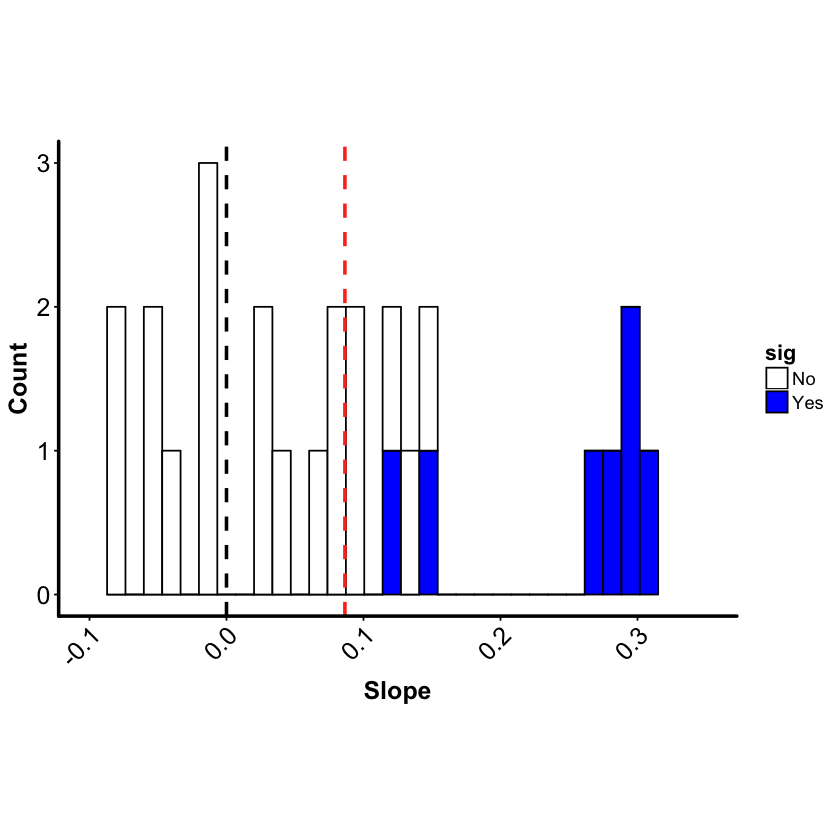

In [73]:
StdSlopes_Observed = rbind(Johnson_lmSummary_filtered, Thompson_lmSummary_filtered)

# Histogram of slopes for 'Cyan' with no migration
HistSlopes_Observed <- ggplot(StdSlopes_Observed, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = StdSlopes_Observed, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.1, 0.35)) + scale_x_continuous(breaks = seq(from = -0.1, to = 0.30, by = 0.1)) +
    ng1.45
HistSlopes_Observed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


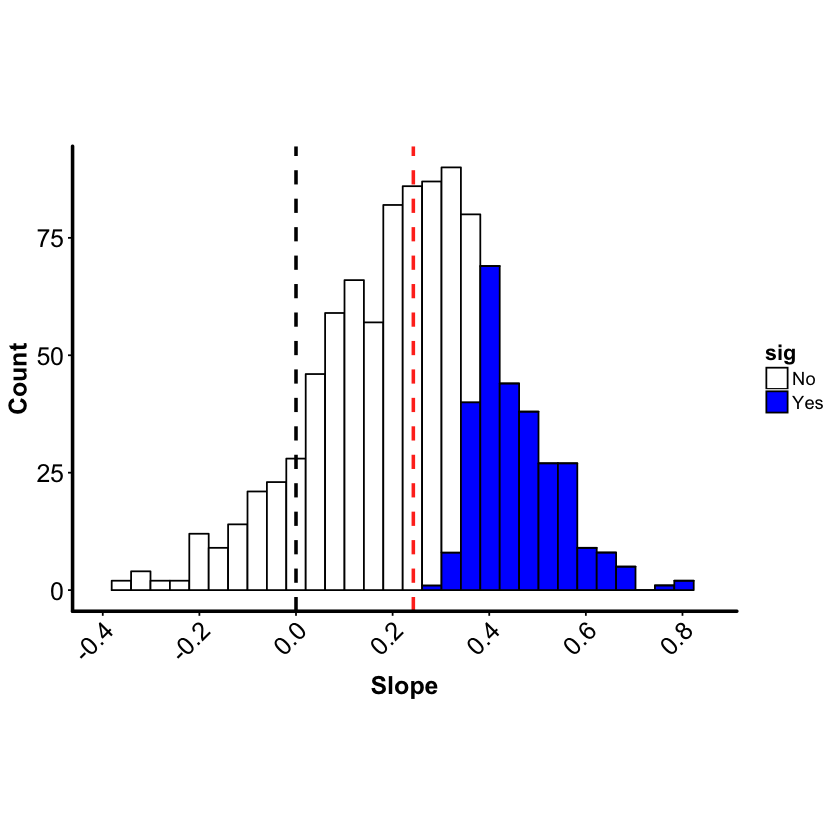

In [72]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes <- ggplot(Santangelo_et_al_data_Gen250, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.4, 0.85)) + scale_x_continuous(breaks = seq(from = -0.4, to = 0.8, by = 0.2)) +
    ng1.45 
Santangelo_HistSlopes

In [62]:
StdSlopes_AllData <- bind_rows(Johnson_lmSummary_filtered, Thompson_lmSummary_filtered, Santangelo_et_al_data_Gen250)


Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”

ERROR: Error in eval(expr, envir, enclos): Can not automatically convert from character to integer in column "cline".
